# Phone screen question

### Problem

A tower has 100 floors. You've been given two eggs. The eggs are strong enough that they can be dropped from a particular floor in the tower without breaking. You've been tasked to find the highest floor an egg can be dropped without breaking, in as few drops as possible. If an egg is dropped from above its target floor it will break. If it is dropped from that floor or below, it will be intact and you can test drop the egg again on another floor.

Show algorithmically how you would go about doing this in as few drops as possible

### My solution

I would go up in increments of 10 floors at a time, starting at floor 10. If an egg breaks at a floor, I would go back to the floor right after the one before the egg broke at (if it broke at 70, I would go to 61). I would then test at that floor and if it doesnt break go up one floor at a time to see where it breaks. The highest floor it can go without breaking would be the one right before it breaks.

### Correct Solution

My solution is correct!

# On-Site Question 1

You are given a list of stock prices for Amazon stock over time. The index of the list is the timestamp, so it goes in order of time. Your job is to find the function that will return the max profit from the purchase and sale of a single stock share. Note that you can only buy and sell going forward in time (you cannot short stock).

### My Solution

I would loop through the list and hold 2 variables, min and profit. Min would start at the first element of the list, and prices would start at 0. I would then loop through the list: if the item I was on was less than the min, it would become the new min. However, if that number minus the min was greater than the profit, that number minus the min would become the new profit. This loop would keep going on until a solution is reached.

In [2]:
def maxProfit(prices):
    
    minPrice = prices[0]
    maxProfit = 0
    
    for i in prices:
        if i < minPrice:
            minPrice = i
        
        if i - minPrice > maxProfit:
            maxProfit = i - minPrice
    
    return maxProfit

In [4]:
print(maxProfit([12,11,15,3,10]))

7


### Correct Solution

My solution is correct!

# On-Site Question 2

Given a list of integers, write a function that will return a list, in which for each index the element will be the product of all the integers except for the integer at that index. 


For example, given a list [1,2,3,4] you would return [24,12,8,6] by doing [2x3x4 , 1x3x4 , 1x2x4 , 1x2x3]


Also, your solution cannot use division as an operator

### My solution

In [36]:
def q2(inp):
    #vault o' math
    vault = {}
    #running product of multiplication
    prod = 1
    #for loop to build the vault o' math in the "before" part
    for i in range(len(inp)):
        vault[i] = [prod,1]
        prod *= inp[i]
    #reset prod
    prod = 1
    #for loop to build the vault o' math in the "after" part
    for i in range(len(inp)-1,-1,-1):
        vault[i][1] = prod
        prod *= inp[i]
    #final return list
    r = []
    #for loop to iterate the vault and multiply the items into the final return list
    for i in vault.values():
        r.append(i[0]*i[1])
    return r

In [37]:
q2([1,2,3,4])

[24, 12, 8, 6]

### Correct Solution

My solution was correct!

# On-Site Question 3

Given two rectangles, determine if they overlap. The rectangles are defined as a Dictionary, for example:

r1 = {
    
         # x and y coordinates of the bottom-left corner of the rectangle
         'x': 2 , 'y': 4,
         
         # Width and Height of rectangle
         'w':5,'h':12}
         
If the rectangles do overlap, return the dictionary which describes the overlapping section

### My solution

In [3]:
r1 = {'x':1,
     'y': 1,
     'h':2,
     'w':3}
r2 = {'x':3,
     'y': 2,
     'h':2,
     'w':2}
def rect_area(r1,r2,flipped = False):
    #construct points
    points1 = {'BL':[r1['x'],r1['y']],
              'UL':[r1['x'],r1['y']+r1['h']],
              'BR':[r1['x']+r1['w'],r1['y']],
              'UR':[r1['x']+r1['w'],r1['y']+r1['h']]}
    points2 = {'BL':[r2['x'],r2['y']],
              'UL':[r2['x'],r2['y']+r2['h']],
              'BR':[r2['x']+r2['w'],r2['y']],
              'UR':[r2['x']+r2['w'],r2['y']+r2['h']]}
    #set bounds for r1
    points1['upperx'] = points1['UR'][0]
    points1['lowerx'] = points1['BL'][0]
    points1['uppery'] = points1['UR'][1]
    points1['lowery'] = points1['BL'][1]
    #set bounds for r2
    points2['upperx'] = points2['UR'][0]
    points2['lowerx'] = points2['BL'][0]
    points2['uppery'] = points2['UR'][1]
    points2['lowery'] = points2['BL'][1]
    #create counter variable
    inside = []
    #fill counter variable by checking if points1 is in points2
    for i in points1:
        try:
            if points2['upperx']>points1[i][0]>points2['lowerx'] and points2['uppery']>points1[i][1]>points2['lowery']:
                inside.append(i)
        except:
            continue
    #if statements to separate into scenarios

    #if no points are inside, meaning that either the thing needs to be flipped or they do not intersect
    if inside == []:
        #if it's already been flipped
        if flipped == True:
            return None
        #if it needs to be flipped
        else:
            return rect_area(r2,r1,True)
    #if four points are inside, meaning one rectangle is in another
    elif len(inside) == 4:
        return r1
    #if there is one point inside, meaning that a corner is in
    elif len(inside) == 1:
        #if the upper left corner is in, meaning that it is scenario 8 below
        if inside[0] == 'UL':
            return {'x':points1['UL'][0],
                   'y':points2['BL'][1],
                   'h':points1['UL'][1]-points2['BL'][1],
                   'w':points2['UR'][0]-points1['UL'][0]}
        #if the upper right corner is in, meaning that it is scenario 7 below
        elif inside[0] == 'UR':
            return {'x':points2['BL'][0],
                   'y':points2['BL'][1],
                   'h':points1['UR'][1]-points2['BR'][1],
                   'w':points1['UR'][0]-points2['UL'][0]}
        #if the bottom right corner is in, meaning that it is scenario 6 below
        elif inside[0] == 'BR':
            return {'x':points2['UL'][0],
                   'y':points1['BR'][1],
                   'h':points2['UR'][1]-points1['BR'][1],
                   'w':points1['BR'][0]-points2['BL'][0]}
        #if the bottom left corner is in, meaning that it is scenario 5 below
        elif inside[0] == 'BL':
            return {'x':points1['BL'][0],
                   'y':points1['BL'][1],
                   'h':points2['UL'][1]-points1['BL'][1],
                   'w':points2['BR'][0]-points1['BL'][0]}
        
    #if there is two points inside, meaning that a side is in
    elif len(inside) == 2:
        #if the bottom right and upper right corners are in, meaning that it is scenario 4 below
        if 'UR' in inside and 'BR' in inside:
            return {'x':points2['BL'][0],
                   'y':points1['BL'][1],
                   'h':r1['h'],
                   'w':points1['BR'][0]-points2['BL'][0]}
        #if the upper right and upper left corners are in, meaning that it is scenario 3 below
        elif 'UR' in inside and 'UL' in inside:
            return {'x':points1['BL'][0],
                   'y':points2['BL'][1],
                   'h':points1['UR']-points2['BL'],
                   'w':r1['w']}
        #if the bottom left and bottom right corners are in, meaning that it is scenario 2 below
        elif 'BR' in inside and 'BL' in inside:
            return {'x':r1['x'],
                   'y':r1['y'],
                   'h':points2['UL']-points1['BL'],
                   'w':r1['w']}
        #if the bottom left and upper left corners are in, meaning that it is scenario 1 below
        elif 'BL' in inside and 'UL' in inside:
            return {'x':r1['x'],
                   'y':r1['y'],
                   'h':r1['h'],
                   'w':points1['BL'][0]-points2['BR'][0]}
rect_area(r1,r2)

{'x': 3, 'y': 2, 'h': 1, 'w': 1}

### Scenarios 

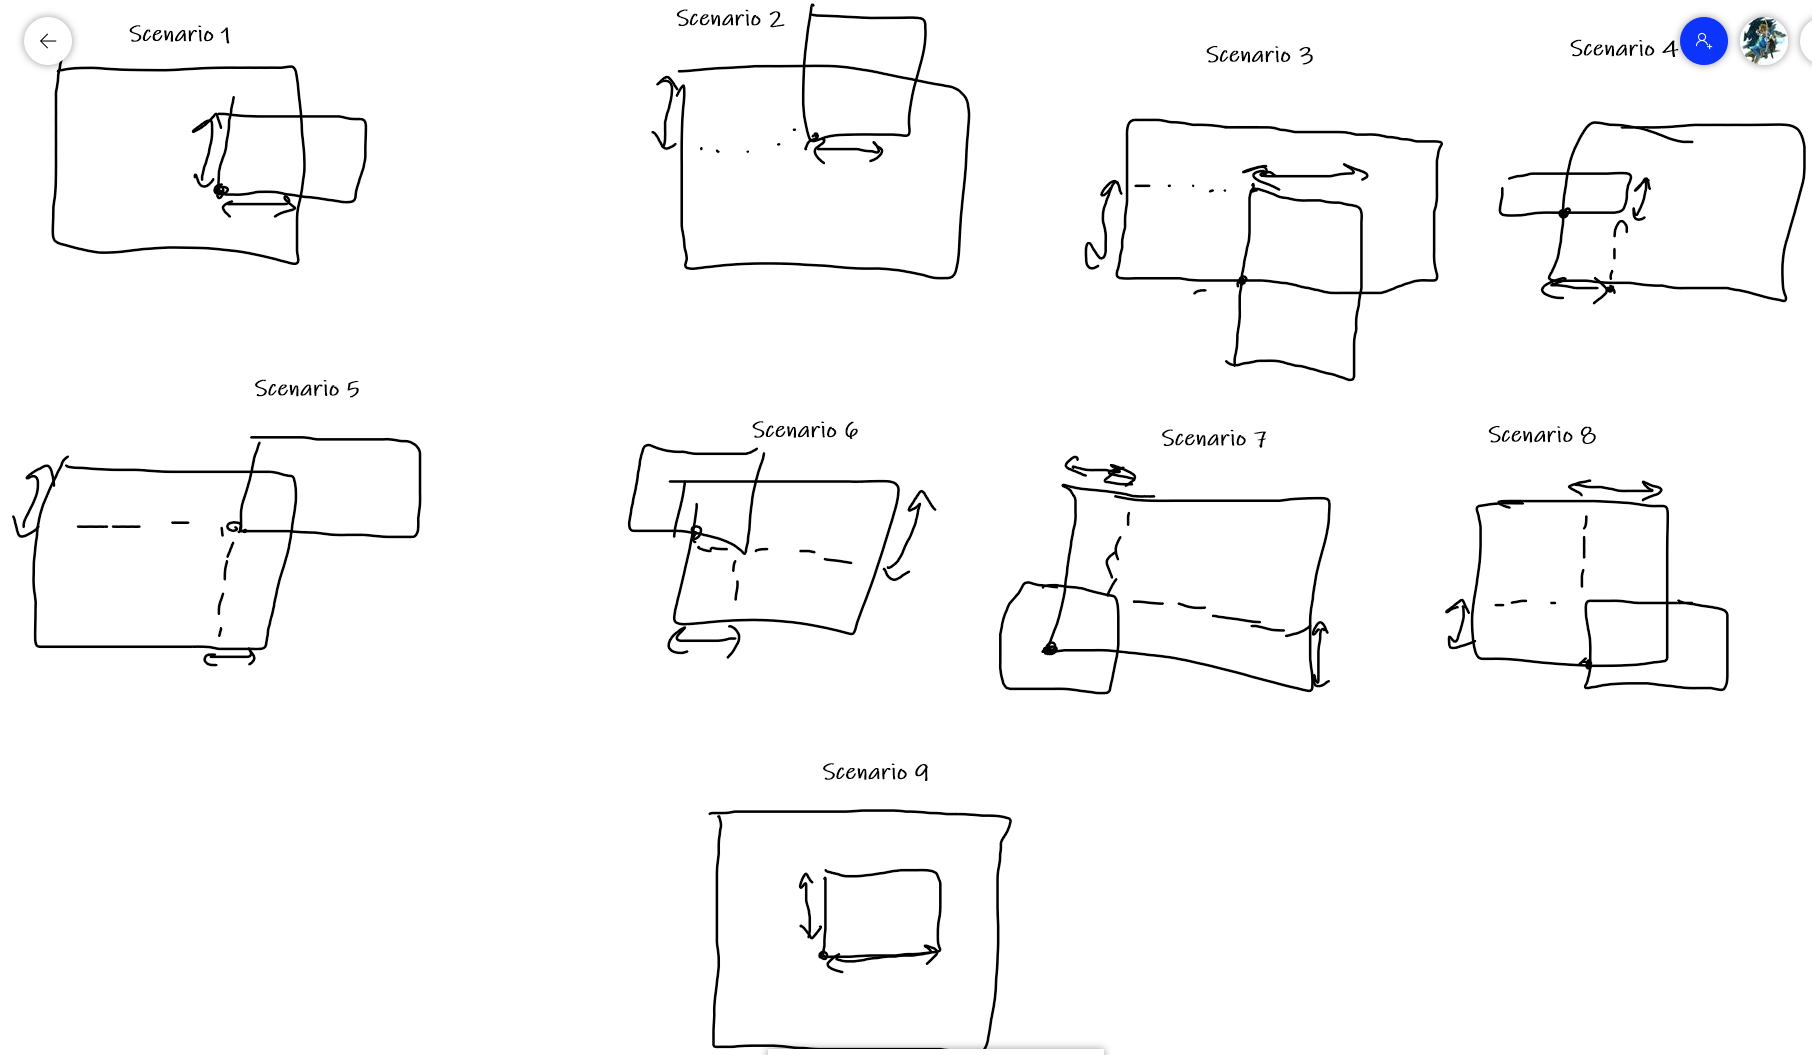

### Correct Solution

To solve, we need to break it up into smaller sub problems. We need to think about a couple things:

1. How can we determine if there is an intersection?
2. What if one rectangle is completely inside another rectangle?
3. What if the two rectangles do not intersect but instead share an edge?

To split it up into subproblems, we can split it into an x-axis problem and a y-axis problem. We will create a function that can detect overlap in 1 dimension, then split the rectangles into x and width and y and height components. Then, we can see that if there is overlap on both dimensions, then the rectangles themselves intersect.

Let's create a function to detect overlap in 1 dimension:

In [4]:
#here, coor1 and coor2 are the coordinate values (x or y) for the two rectangles,
#and dim1 and dim2 are the dimentions (width or height) for the two rectangles
def calc_overlap(coor1,dim1,coor2,dim2):
    
    #What we do first is to find the greater of the two coordinates - if we are dealing with the
    #x-axis, we are looking for the one furthest to the right. If we are dealing with the y-axis, 
    #we are looking for the one highest up. 
    
    greater = max(coor1,coor2)
    
    #If you draw it out, you can see that the greater point is going to be the start of the overlap.
    #The end of the overlap will be the lower of the two endpoints of the two lines.
    
    lower = min(coor1 + dim1,coor2 + dim2)
    
    #If there is no overlap, we want to return a tuple of None's. To find if there is no overlap,
    #we can see if the end of the overlap starts before the start of the overlap - if that happens,
    #then there is no overlap. Because the greater is the start and lower is the end, we can just 
    #compare the two.
    
    if greater >= lower:
        return (None, None)
    
    #Now that we have removed the case that there is no overlap, we know that we must have an overlap now.
    #Our overlap will start at the point 'greater' and have a size of lower - greater. Let's return that.
    
    overlap = lower - greater
    
    return (greater, overlap)

Now that we have seen how to find a one-dimensional overlap, we can easily create a function to see a full rectangle overlap. Because we return a tuple with the first item being the coordinate of overlap and the second item being the overlap size, we can just run the function and use the components to find the rectangle overlap size:

In [8]:
#Here, r1 and r2 are the two rectangles
def calc_rect_overlap(r1,r2):
    
    #Here, we take the x and width values using calc overlap. We also find the y value and the height.
    x_value, width_value = calc_overlap(r1['x'], r1['w'], r2['x'], r2['w'])
    y_value, height_value = calc_overlap(r1['y'], r1['h'], r2['y'], r2['h'])
    
    #Now, we check if there was no overlap using our knowledge that it returns a tuple of None's if there isn't one.
    if not width_value or not height_value:
        print('No Overlap!')
        return None
    
    #Now, we return the dictionary.
    return {'x':x_value,
           'y': y_value,
           'w': width_value,
           'h': height_value}

In [9]:
r1 = {'x':1,
     'y': 1,
     'h':2,
     'w':3}
r2 = {'x':3,
     'y': 2,
     'h':2,
     'w':2}

In [10]:
calc_rect_overlap(r1,r2)

{'x': 3, 'y': 2, 'w': 1, 'h': 1}